In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">01_딥러닝/머신러닝입문 회귀분석</font></b>
# 1. 기존의 프로그램 방식
 - 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
 - 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erroerror ; 절대값평균)
 - https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
 ![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
 - 경사하강법 설명
 - https://www.mql5.com/ko/articles/11200

In [4]:
# 섭씨온도(input data=독립변수)를 화씨온도(target data=종속변수)를 출력
def celsius_to_fahrenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨 온도는?'))
print('화씨온도는', celsius_to_fahrenheit(input_c))

섭씨 온도는?1
화씨온도는 33.8


# 2. 딥러닝/머신러닝 프로그램 방식
 - 1. 데이터 확보 및 생성
 - 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
 - 3. 모델구성
 - 4. 모델 학습 과정 설정
 - 5. 모델 학습시키기(훈련, 검증데이터셋)
 - 6. 모델 평가(시험데이터셋)
 - 7. 모델 저장/사용(입력값을 주어지면 예측값을 받기)

## 2.1 노이즈가 없는 데이터 실습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU') # 없으면 빈 리스트

[]

In [2]:
# 1. 데이터 확보(생성)
data_C = np.arange(100)
data_C # input데이터(독립변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_F = celsius_to_fahrenheit(data_C)
data_F

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [6]:
# 2. 데이터 전처리 : 스케일조정(컴퓨터에게 학습시키기 위해 정규화/표준화 : 전체의 편차를 비슷하게
scaled_data_C = data_C/100
scaled_data_F = data_F/100
print('독립변수 :', scaled_data_C)
print('타겟변수 :', scaled_data_F)

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [13]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Input, Dense # 입력값과 출력값으로 layer층 지정
model = Sequential()
model.add(Input(shape=(1,))) # 입력(독립)변수의 shape
model.add(Dense(1)) # 타겟(종속, 출력)변수의 갯수
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# 4. 모델 학습 과정 설정
model.compile(loss='mse',optimizer='rmsprop', metrics=['mae']) # 손실함수, 옵티마이서, 평가지표

In [16]:
# 학습전 예측
model.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 219ms/step


array([[ 0.        ],
       [-0.01662275]], dtype=float32)

In [17]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [18]:
# 5. 모델 학습시키기 - 셀1번만 실행
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2) # 독립변수, 타겟변수, 학습횟수, 출력여부
# verbose=0:출력없음 / 1:기본값출력 / 2:에포크별 자세한 로그 출력

Epoch 1/1000
4/4 - 1s - loss: 5.1162 - mae: 2.0294 - 512ms/epoch - 128ms/step
Epoch 2/1000
4/4 - 0s - loss: 5.0659 - mae: 2.0183 - 15ms/epoch - 4ms/step
Epoch 3/1000
4/4 - 0s - loss: 5.0275 - mae: 2.0094 - 12ms/epoch - 3ms/step
Epoch 4/1000
4/4 - 0s - loss: 4.9981 - mae: 2.0028 - 11ms/epoch - 3ms/step
Epoch 5/1000
4/4 - 0s - loss: 4.9718 - mae: 1.9968 - 2ms/epoch - 407us/step
Epoch 6/1000
4/4 - 0s - loss: 4.9437 - mae: 1.9904 - 15ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 4.9181 - mae: 1.9845 - 14ms/epoch - 3ms/step
Epoch 8/1000
4/4 - 0s - loss: 4.8923 - mae: 1.9785 - 3ms/epoch - 626us/step
Epoch 9/1000
4/4 - 0s - loss: 4.8659 - mae: 1.9723 - 8ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 4.8397 - mae: 1.9663 - 3ms/epoch - 811us/step
Epoch 11/1000
4/4 - 0s - loss: 4.8141 - mae: 1.9604 - 0s/epoch - 0s/step
Epoch 12/1000
4/4 - 0s - loss: 4.7887 - mae: 1.9544 - 17ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 4.7613 - mae: 1.9481 - 0s/epoch - 0s/step
Epoch 14/1000
4/4 - 0s

Epoch 110/1000
4/4 - 0s - loss: 2.6776 - mae: 1.3885 - 885us/epoch - 221us/step
Epoch 111/1000
4/4 - 0s - loss: 2.6590 - mae: 1.3829 - 15ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 2.6408 - mae: 1.3773 - 4ms/epoch - 1ms/step
Epoch 113/1000
4/4 - 0s - loss: 2.6246 - mae: 1.3724 - 11ms/epoch - 3ms/step
Epoch 114/1000
4/4 - 0s - loss: 2.6069 - mae: 1.3671 - 0s/epoch - 0s/step
Epoch 115/1000
4/4 - 0s - loss: 2.5890 - mae: 1.3616 - 3ms/epoch - 739us/step
Epoch 116/1000
4/4 - 0s - loss: 2.5704 - mae: 1.3560 - 13ms/epoch - 3ms/step
Epoch 117/1000
4/4 - 0s - loss: 2.5524 - mae: 1.3504 - 0s/epoch - 0s/step
Epoch 118/1000
4/4 - 0s - loss: 2.5346 - mae: 1.3448 - 15ms/epoch - 4ms/step
Epoch 119/1000
4/4 - 0s - loss: 2.5164 - mae: 1.3393 - 0s/epoch - 0s/step
Epoch 120/1000
4/4 - 0s - loss: 2.5000 - mae: 1.3343 - 16ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 2.4816 - mae: 1.3285 - 0s/epoch - 0s/step
Epoch 122/1000
4/4 - 0s - loss: 2.4655 - mae: 1.3235 - 2ms/epoch - 419us/step
Epoch 1

Epoch 218/1000
4/4 - 0s - loss: 1.1557 - mae: 0.8777 - 0s/epoch - 0s/step
Epoch 219/1000
4/4 - 0s - loss: 1.1459 - mae: 0.8741 - 3ms/epoch - 691us/step
Epoch 220/1000
4/4 - 0s - loss: 1.1360 - mae: 0.8703 - 0s/epoch - 0s/step
Epoch 221/1000
4/4 - 0s - loss: 1.1246 - mae: 0.8659 - 3ms/epoch - 708us/step
Epoch 222/1000
4/4 - 0s - loss: 1.1142 - mae: 0.8619 - 14ms/epoch - 3ms/step
Epoch 223/1000
4/4 - 0s - loss: 1.1035 - mae: 0.8578 - 0s/epoch - 0s/step
Epoch 224/1000
4/4 - 0s - loss: 1.0934 - mae: 0.8540 - 16ms/epoch - 4ms/step
Epoch 225/1000
4/4 - 0s - loss: 1.0837 - mae: 0.8501 - 14ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 1.0746 - mae: 0.8466 - 961us/epoch - 240us/step
Epoch 227/1000
4/4 - 0s - loss: 1.0666 - mae: 0.8433 - 17ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 1.0555 - mae: 0.8391 - 0s/epoch - 0s/step
Epoch 229/1000
4/4 - 0s - loss: 1.0456 - mae: 0.8354 - 4ms/epoch - 926us/step
Epoch 230/1000
4/4 - 0s - loss: 1.0370 - mae: 0.8320 - 12ms/epoch - 3ms/step
Epoch

Epoch 326/1000
4/4 - 0s - loss: 0.4427 - mae: 0.5691 - 0s/epoch - 0s/step
Epoch 327/1000
4/4 - 0s - loss: 0.4391 - mae: 0.5672 - 10ms/epoch - 2ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.4372 - mae: 0.5661 - 8ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.4338 - mae: 0.5642 - 0s/epoch - 0s/step
Epoch 330/1000
4/4 - 0s - loss: 0.4310 - mae: 0.5626 - 15ms/epoch - 4ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.4275 - mae: 0.5607 - 0s/epoch - 0s/step
Epoch 332/1000
4/4 - 0s - loss: 0.4245 - mae: 0.5591 - 17ms/epoch - 4ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.4224 - mae: 0.5579 - 0s/epoch - 0s/step
Epoch 334/1000
4/4 - 0s - loss: 0.4206 - mae: 0.5569 - 16ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.4178 - mae: 0.5552 - 0s/epoch - 0s/step
Epoch 336/1000
4/4 - 0s - loss: 0.4157 - mae: 0.5541 - 2ms/epoch - 535us/step
Epoch 337/1000
4/4 - 0s - loss: 0.4139 - mae: 0.5530 - 0s/epoch - 0s/step
Epoch 338/1000
4/4 - 0s - loss: 0.4110 - mae: 0.5514 - 2ms/epoch - 605us/step
Epoch 339/1000
4

Epoch 434/1000
4/4 - 0s - loss: 0.2837 - mae: 0.4605 - 0s/epoch - 0s/step
Epoch 435/1000
4/4 - 0s - loss: 0.2827 - mae: 0.4597 - 17ms/epoch - 4ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.2815 - mae: 0.4587 - 6ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.2805 - mae: 0.4579 - 8ms/epoch - 2ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.2795 - mae: 0.4570 - 0s/epoch - 0s/step
Epoch 439/1000
4/4 - 0s - loss: 0.2786 - mae: 0.4563 - 15ms/epoch - 4ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.2774 - mae: 0.4552 - 0s/epoch - 0s/step
Epoch 441/1000
4/4 - 0s - loss: 0.2764 - mae: 0.4545 - 0s/epoch - 0s/step
Epoch 442/1000
4/4 - 0s - loss: 0.2753 - mae: 0.4535 - 2ms/epoch - 553us/step
Epoch 443/1000
4/4 - 0s - loss: 0.2743 - mae: 0.4527 - 0s/epoch - 0s/step
Epoch 444/1000
4/4 - 0s - loss: 0.2733 - mae: 0.4519 - 15ms/epoch - 4ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.2722 - mae: 0.4511 - 0s/epoch - 0s/step
Epoch 446/1000
4/4 - 0s - loss: 0.2712 - mae: 0.4503 - 18ms/epoch - 4ms/step
Epoch 447/1000
4/4

4/4 - 0s - loss: 0.1826 - mae: 0.3692 - 0s/epoch - 0s/step
Epoch 543/1000
4/4 - 0s - loss: 0.1816 - mae: 0.3682 - 10ms/epoch - 2ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.1808 - mae: 0.3675 - 2ms/epoch - 566us/step
Epoch 545/1000
4/4 - 0s - loss: 0.1799 - mae: 0.3665 - 0s/epoch - 0s/step
Epoch 546/1000
4/4 - 0s - loss: 0.1792 - mae: 0.3656 - 4ms/epoch - 923us/step
Epoch 547/1000
4/4 - 0s - loss: 0.1785 - mae: 0.3649 - 0s/epoch - 0s/step
Epoch 548/1000
4/4 - 0s - loss: 0.1778 - mae: 0.3641 - 3ms/epoch - 689us/step
Epoch 549/1000
4/4 - 0s - loss: 0.1772 - mae: 0.3634 - 0s/epoch - 0s/step
Epoch 550/1000
4/4 - 0s - loss: 0.1765 - mae: 0.3627 - 2ms/epoch - 423us/step
Epoch 551/1000
4/4 - 0s - loss: 0.1760 - mae: 0.3620 - 14ms/epoch - 3ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.1753 - mae: 0.3614 - 1ms/epoch - 316us/step
Epoch 553/1000
4/4 - 0s - loss: 0.1746 - mae: 0.3605 - 15ms/epoch - 4ms/step
Epoch 554/1000
4/4 - 0s - loss: 0.1740 - mae: 0.3599 - 0s/epoch - 0s/step
Epoch 555/1000
4/4 - 0s 

Epoch 650/1000
4/4 - 0s - loss: 0.1060 - mae: 0.2809 - 4ms/epoch - 1ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.1053 - mae: 0.2801 - 0s/epoch - 0s/step
Epoch 652/1000
4/4 - 0s - loss: 0.1046 - mae: 0.2791 - 3ms/epoch - 679us/step
Epoch 653/1000
4/4 - 0s - loss: 0.1040 - mae: 0.2784 - 7ms/epoch - 2ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.1034 - mae: 0.2775 - 8ms/epoch - 2ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.1029 - mae: 0.2767 - 0s/epoch - 0s/step
Epoch 656/1000
4/4 - 0s - loss: 0.1024 - mae: 0.2760 - 17ms/epoch - 4ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.1018 - mae: 0.2753 - 0s/epoch - 0s/step
Epoch 658/1000
4/4 - 0s - loss: 0.1013 - mae: 0.2745 - 4ms/epoch - 878us/step
Epoch 659/1000
4/4 - 0s - loss: 0.1008 - mae: 0.2738 - 0s/epoch - 0s/step
Epoch 660/1000
4/4 - 0s - loss: 0.1003 - mae: 0.2732 - 3ms/epoch - 681us/step
Epoch 661/1000
4/4 - 0s - loss: 0.0997 - mae: 0.2725 - 0s/epoch - 0s/step
Epoch 662/1000
4/4 - 0s - loss: 0.0991 - mae: 0.2717 - 3ms/epoch - 659us/step
Epoch 663/100

Epoch 758/1000
4/4 - 0s - loss: 0.0492 - mae: 0.1913 - 17ms/epoch - 4ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0488 - mae: 0.1905 - 0s/epoch - 0s/step
Epoch 760/1000
4/4 - 0s - loss: 0.0484 - mae: 0.1896 - 747us/epoch - 187us/step
Epoch 761/1000
4/4 - 0s - loss: 0.0480 - mae: 0.1890 - 15ms/epoch - 4ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0476 - mae: 0.1883 - 0s/epoch - 0s/step
Epoch 763/1000
4/4 - 0s - loss: 0.0473 - mae: 0.1876 - 15ms/epoch - 4ms/step
Epoch 764/1000
4/4 - 0s - loss: 0.0469 - mae: 0.1867 - 0s/epoch - 0s/step
Epoch 765/1000
4/4 - 0s - loss: 0.0464 - mae: 0.1858 - 17ms/epoch - 4ms/step
Epoch 766/1000
4/4 - 0s - loss: 0.0460 - mae: 0.1850 - 0s/epoch - 0s/step
Epoch 767/1000
4/4 - 0s - loss: 0.0456 - mae: 0.1843 - 17ms/epoch - 4ms/step
Epoch 768/1000
4/4 - 0s - loss: 0.0452 - mae: 0.1834 - 9ms/epoch - 2ms/step
Epoch 769/1000
4/4 - 0s - loss: 0.0448 - mae: 0.1825 - 3ms/epoch - 661us/step
Epoch 770/1000
4/4 - 0s - loss: 0.0444 - mae: 0.1817 - 10ms/epoch - 2ms/step
Epoch 77

Epoch 866/1000
4/4 - 0s - loss: 0.0143 - mae: 0.1032 - 0s/epoch - 0s/step
Epoch 867/1000
4/4 - 0s - loss: 0.0141 - mae: 0.1023 - 4ms/epoch - 970us/step
Epoch 868/1000
4/4 - 0s - loss: 0.0138 - mae: 0.1014 - 0s/epoch - 0s/step
Epoch 869/1000
4/4 - 0s - loss: 0.0137 - mae: 0.1009 - 17ms/epoch - 4ms/step
Epoch 870/1000
4/4 - 0s - loss: 0.0134 - mae: 0.0999 - 0s/epoch - 0s/step
Epoch 871/1000
4/4 - 0s - loss: 0.0132 - mae: 0.0990 - 14ms/epoch - 3ms/step
Epoch 872/1000
4/4 - 0s - loss: 0.0129 - mae: 0.0981 - 0s/epoch - 0s/step
Epoch 873/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0973 - 16ms/epoch - 4ms/step
Epoch 874/1000
4/4 - 0s - loss: 0.0125 - mae: 0.0965 - 0s/epoch - 0s/step
Epoch 875/1000
4/4 - 0s - loss: 0.0123 - mae: 0.0956 - 17ms/epoch - 4ms/step
Epoch 876/1000
4/4 - 0s - loss: 0.0120 - mae: 0.0947 - 0s/epoch - 0s/step
Epoch 877/1000
4/4 - 0s - loss: 0.0118 - mae: 0.0939 - 13ms/epoch - 3ms/step
Epoch 878/1000
4/4 - 0s - loss: 0.0116 - mae: 0.0930 - 2ms/epoch - 399us/step
Epoch 879/1000


Epoch 973/1000
4/4 - 0s - loss: 3.5725e-04 - mae: 0.0163 - 12ms/epoch - 3ms/step
Epoch 974/1000
4/4 - 0s - loss: 3.2131e-04 - mae: 0.0155 - 5ms/epoch - 1ms/step
Epoch 975/1000
4/4 - 0s - loss: 2.8562e-04 - mae: 0.0147 - 12ms/epoch - 3ms/step
Epoch 976/1000
4/4 - 0s - loss: 2.5536e-04 - mae: 0.0138 - 0s/epoch - 0s/step
Epoch 977/1000
4/4 - 0s - loss: 2.2604e-04 - mae: 0.0130 - 2ms/epoch - 473us/step
Epoch 978/1000
4/4 - 0s - loss: 2.0345e-04 - mae: 0.0122 - 15ms/epoch - 4ms/step
Epoch 979/1000
4/4 - 0s - loss: 1.7467e-04 - mae: 0.0114 - 2ms/epoch - 518us/step
Epoch 980/1000
4/4 - 0s - loss: 1.5226e-04 - mae: 0.0107 - 0s/epoch - 0s/step
Epoch 981/1000
4/4 - 0s - loss: 1.3185e-04 - mae: 0.0100 - 2ms/epoch - 448us/step
Epoch 982/1000
4/4 - 0s - loss: 1.1328e-04 - mae: 0.0092 - 0s/epoch - 0s/step
Epoch 983/1000
4/4 - 0s - loss: 9.6637e-05 - mae: 0.0085 - 935us/epoch - 234us/step
Epoch 984/1000
4/4 - 0s - loss: 8.4039e-05 - mae: 0.0079 - 0s/epoch - 0s/step
Epoch 985/1000
4/4 - 0s - loss: 7.0

In [20]:
# 6. 모델 과정 시각화
hist.history.keys()

dict_keys(['loss', 'mae'])

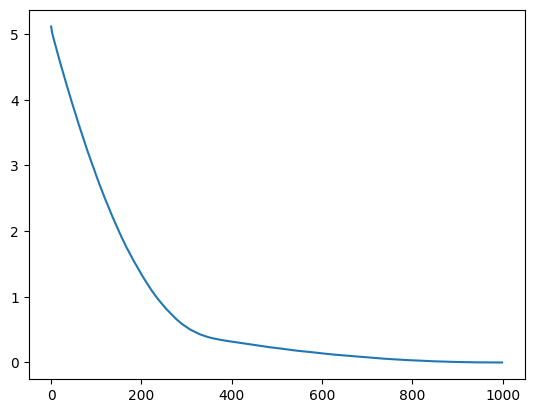

In [21]:
plt.plot(hist.history['loss'])

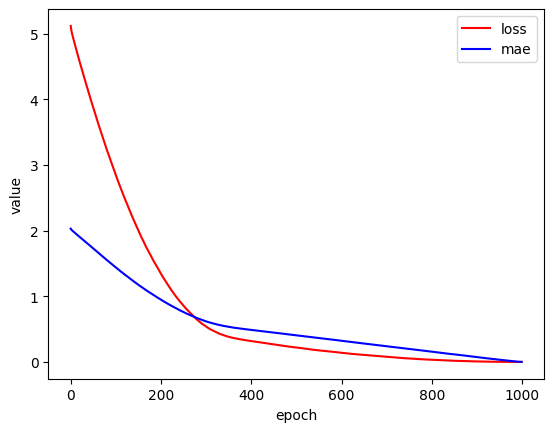

In [22]:
plt.plot(hist.history['loss'],'r',label='loss')
plt.plot(hist.history['mae'],'b',label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [24]:
# 7. 모델 사용/저장
model.predict(np.array([[0],[0.01],[0.02]]))

1/1 [==============================] - 0s 33ms/step


array([[0.31945854],
       [0.33745015],
       [0.35544175]], dtype=float32)

In [25]:
model.save('model/before_learning1.h5')

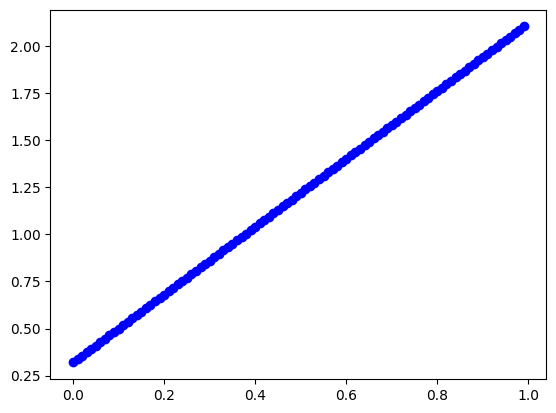

In [26]:
plt.scatter(x=scaled_data_C,y=scaled_data_F, c='b')

In [7]:
y_hat = model.predict([scaled_data_C]) # 예측값
#y_hat
for h,y in zip(y_hat[::10], scaled_data_F[::10]):
    print(h,y)

NameError: name 'model' is not defined

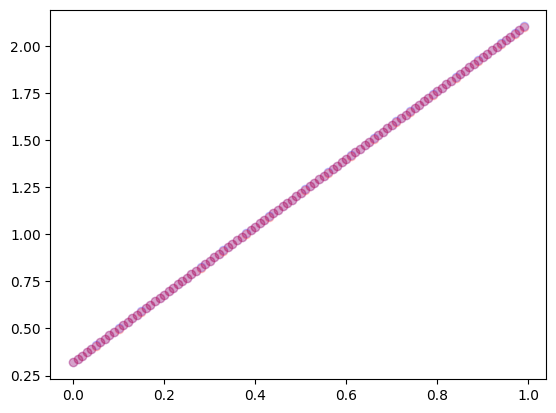

In [35]:
plt.scatter(x=scaled_data_C,y=scaled_data_F, c='b', alpha=0.2)
plt.scatter(x=scaled_data_C,y=y_hat, c='r', alpha=0.2)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [37]:
scaled_data_C

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [38]:
scaled_data_F

array([0.32 , 0.338, 0.356, 0.374, 0.392, 0.41 , 0.428, 0.446, 0.464,
       0.482, 0.5  , 0.518, 0.536, 0.554, 0.572, 0.59 , 0.608, 0.626,
       0.644, 0.662, 0.68 , 0.698, 0.716, 0.734, 0.752, 0.77 , 0.788,
       0.806, 0.824, 0.842, 0.86 , 0.878, 0.896, 0.914, 0.932, 0.95 ,
       0.968, 0.986, 1.004, 1.022, 1.04 , 1.058, 1.076, 1.094, 1.112,
       1.13 , 1.148, 1.166, 1.184, 1.202, 1.22 , 1.238, 1.256, 1.274,
       1.292, 1.31 , 1.328, 1.346, 1.364, 1.382, 1.4  , 1.418, 1.436,
       1.454, 1.472, 1.49 , 1.508, 1.526, 1.544, 1.562, 1.58 , 1.598,
       1.616, 1.634, 1.652, 1.67 , 1.688, 1.706, 1.724, 1.742, 1.76 ,
       1.778, 1.796, 1.814, 1.832, 1.85 , 1.868, 1.886, 1.904, 1.922,
       1.94 , 1.958, 1.976, 1.994, 2.012, 2.03 , 2.048, 2.066, 2.084,
       2.102])

In [8]:
# noise : 평균 0, 표준편차 0.1인 데이터 100개인 배열
np.random.seed(707)
noise = np.random.normal(0, scale=0.1, size=100)
noised_scaled_data_F = scaled_data_F + noise
print('독립변수 :', scaled_data_C[:10])
print('타겟변수 :', noised_scaled_data_F[:10])

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
타겟변수 : [0.27500034 0.20410134 0.39498826 0.27117424 0.26897164 0.35314388
 0.4496784  0.42612159 0.49409646 0.45740286]


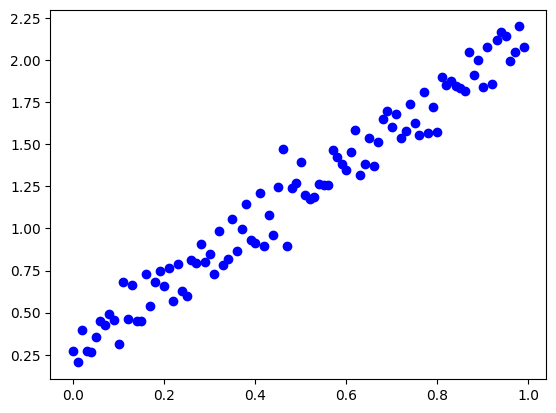

In [10]:
plt.scatter(x=scaled_data_C,y=noised_scaled_data_F, c='b')

In [27]:
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Input, Dense # 입력값과 출력값으로 layer층 지정
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(units=1, input_shape=(1,)))
# model2.add(Input(shape=(1,))) # 입력(독립)변수의 shape
# model2.add(Dense(1)) # 타겟(종속, 출력)변수의 갯수
print(model2.summary())
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# 5. 학습시키기
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 - 0s - loss: 3.6214 - mae: 1.7072 - 394ms/epoch - 99ms/step
Epoch 2/1000
4/4 - 0s - loss: 3.5822 - mae: 1.6968 - 6ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 3.5517 - mae: 1.6886 - 8ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 3.5227 - mae: 1.6807 - 9ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 3.4976 - mae: 1.6740 - 9ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 3.4748 - mae: 1.6677 - 7ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 3.4537 - mae: 1.6619 - 10ms/epoch - 3ms/step
Epoch 8/1000
4/4 - 0s - loss: 3.4333 - mae: 1.6563 - 6ms/epoc

4/4 - 0s - loss: 1.7479 - mae: 1.1171 - 0s/epoch - 0s/step
Epoch 104/1000
4/4 - 0s - loss: 1.7328 - mae: 1.1115 - 5ms/epoch - 1ms/step
Epoch 105/1000
4/4 - 0s - loss: 1.7189 - mae: 1.1064 - 0s/epoch - 0s/step
Epoch 106/1000
4/4 - 0s - loss: 1.7052 - mae: 1.1012 - 11ms/epoch - 3ms/step
Epoch 107/1000
4/4 - 0s - loss: 1.6935 - mae: 1.0971 - 0s/epoch - 0s/step
Epoch 108/1000
4/4 - 0s - loss: 1.6782 - mae: 1.0913 - 17ms/epoch - 4ms/step
Epoch 109/1000
4/4 - 0s - loss: 1.6648 - mae: 1.0864 - 9ms/epoch - 2ms/step
Epoch 110/1000
4/4 - 0s - loss: 1.6496 - mae: 1.0807 - 9ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 1.6350 - mae: 1.0752 - 0s/epoch - 0s/step
Epoch 112/1000
4/4 - 0s - loss: 1.6210 - mae: 1.0698 - 15ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 1.6089 - mae: 1.0653 - 16ms/epoch - 4ms/step
Epoch 114/1000
4/4 - 0s - loss: 1.5947 - mae: 1.0599 - 0s/epoch - 0s/step
Epoch 115/1000
4/4 - 0s - loss: 1.5803 - mae: 1.0542 - 15ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 

Epoch 212/1000
4/4 - 0s - loss: 0.6088 - mae: 0.6353 - 7ms/epoch - 2ms/step
Epoch 213/1000
4/4 - 0s - loss: 0.6008 - mae: 0.6313 - 7ms/epoch - 2ms/step
Epoch 214/1000
4/4 - 0s - loss: 0.5957 - mae: 0.6287 - 0s/epoch - 0s/step
Epoch 215/1000
4/4 - 0s - loss: 0.5893 - mae: 0.6254 - 4ms/epoch - 1ms/step
Epoch 216/1000
4/4 - 0s - loss: 0.5846 - mae: 0.6229 - 0s/epoch - 0s/step
Epoch 217/1000
4/4 - 0s - loss: 0.5776 - mae: 0.6194 - 3ms/epoch - 792us/step
Epoch 218/1000
4/4 - 0s - loss: 0.5720 - mae: 0.6164 - 0s/epoch - 0s/step
Epoch 219/1000
4/4 - 0s - loss: 0.5650 - mae: 0.6129 - 875us/epoch - 219us/step
Epoch 220/1000
4/4 - 0s - loss: 0.5585 - mae: 0.6097 - 17ms/epoch - 4ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.5521 - mae: 0.6066 - 0s/epoch - 0s/step
Epoch 222/1000
4/4 - 0s - loss: 0.5466 - mae: 0.6037 - 16ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.5411 - mae: 0.6012 - 0s/epoch - 0s/step
Epoch 224/1000
4/4 - 0s - loss: 0.5339 - mae: 0.5978 - 4ms/epoch - 1ms/step
Epoch 225/1000

Epoch 320/1000
4/4 - 0s - loss: 0.2489 - mae: 0.4311 - 13ms/epoch - 3ms/step
Epoch 321/1000
4/4 - 0s - loss: 0.2480 - mae: 0.4304 - 3ms/epoch - 798us/step
Epoch 322/1000
4/4 - 0s - loss: 0.2469 - mae: 0.4293 - 9ms/epoch - 2ms/step
Epoch 323/1000
4/4 - 0s - loss: 0.2457 - mae: 0.4282 - 2ms/epoch - 445us/step
Epoch 324/1000
4/4 - 0s - loss: 0.2446 - mae: 0.4272 - 0s/epoch - 0s/step
Epoch 325/1000
4/4 - 0s - loss: 0.2436 - mae: 0.4261 - 734us/epoch - 183us/step
Epoch 326/1000
4/4 - 0s - loss: 0.2427 - mae: 0.4254 - 13ms/epoch - 3ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.2418 - mae: 0.4246 - 5ms/epoch - 1ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.2405 - mae: 0.4232 - 10ms/epoch - 3ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.2400 - mae: 0.4229 - 552us/epoch - 138us/step
Epoch 330/1000
4/4 - 0s - loss: 0.2393 - mae: 0.4222 - 14ms/epoch - 4ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.2383 - mae: 0.4212 - 0s/epoch - 0s/step
Epoch 332/1000
4/4 - 0s - loss: 0.2372 - mae: 0.4201 - 13ms/epoch - 3ms/step

4/4 - 0s - loss: 0.1610 - mae: 0.3427 - 0s/epoch - 0s/step
Epoch 428/1000
4/4 - 0s - loss: 0.1602 - mae: 0.3418 - 4ms/epoch - 950us/step
Epoch 429/1000
4/4 - 0s - loss: 0.1596 - mae: 0.3412 - 6ms/epoch - 2ms/step
Epoch 430/1000
4/4 - 0s - loss: 0.1589 - mae: 0.3403 - 10ms/epoch - 2ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.1582 - mae: 0.3397 - 0s/epoch - 0s/step
Epoch 432/1000
4/4 - 0s - loss: 0.1573 - mae: 0.3387 - 2ms/epoch - 621us/step
Epoch 433/1000
4/4 - 0s - loss: 0.1565 - mae: 0.3379 - 12ms/epoch - 3ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.1558 - mae: 0.3371 - 3ms/epoch - 751us/step
Epoch 435/1000
4/4 - 0s - loss: 0.1549 - mae: 0.3361 - 0s/epoch - 0s/step
Epoch 436/1000
4/4 - 0s - loss: 0.1542 - mae: 0.3354 - 4ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.1534 - mae: 0.3344 - 0s/epoch - 0s/step
Epoch 438/1000
4/4 - 0s - loss: 0.1529 - mae: 0.3339 - 17ms/epoch - 4ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.1524 - mae: 0.3333 - 0s/epoch - 0s/step
Epoch 440/1000
4/4 - 0s - lo

Epoch 535/1000
4/4 - 0s - loss: 0.0921 - mae: 0.2585 - 0s/epoch - 0s/step
Epoch 536/1000
4/4 - 0s - loss: 0.0915 - mae: 0.2576 - 4ms/epoch - 1ms/step
Epoch 537/1000
4/4 - 0s - loss: 0.0909 - mae: 0.2570 - 12ms/epoch - 3ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0903 - mae: 0.2559 - 4ms/epoch - 914us/step
Epoch 539/1000
4/4 - 0s - loss: 0.0900 - mae: 0.2555 - 11ms/epoch - 3ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0894 - mae: 0.2546 - 3ms/epoch - 719us/step
Epoch 541/1000
4/4 - 0s - loss: 0.0889 - mae: 0.2538 - 7ms/epoch - 2ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0883 - mae: 0.2528 - 9ms/epoch - 2ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0877 - mae: 0.2521 - 0s/epoch - 0s/step
Epoch 544/1000
4/4 - 0s - loss: 0.0872 - mae: 0.2512 - 16ms/epoch - 4ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0868 - mae: 0.2503 - 0s/epoch - 0s/step
Epoch 546/1000
4/4 - 0s - loss: 0.0863 - mae: 0.2496 - 16ms/epoch - 4ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0858 - mae: 0.2491 - 0s/epoch - 0s/step
Epoch 548/10

Epoch 643/1000
4/4 - 0s - loss: 0.0437 - mae: 0.1765 - 0s/epoch - 0s/step
Epoch 644/1000
4/4 - 0s - loss: 0.0434 - mae: 0.1757 - 5ms/epoch - 1ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0431 - mae: 0.1751 - 11ms/epoch - 3ms/step
Epoch 646/1000
4/4 - 0s - loss: 0.0428 - mae: 0.1745 - 2ms/epoch - 461us/step
Epoch 647/1000
4/4 - 0s - loss: 0.0425 - mae: 0.1740 - 14ms/epoch - 3ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0422 - mae: 0.1733 - 0s/epoch - 0s/step
Epoch 649/1000
4/4 - 0s - loss: 0.0420 - mae: 0.1729 - 17ms/epoch - 4ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0417 - mae: 0.1723 - 0s/epoch - 0s/step
Epoch 651/1000
4/4 - 0s - loss: 0.0414 - mae: 0.1718 - 3ms/epoch - 794us/step
Epoch 652/1000
4/4 - 0s - loss: 0.0412 - mae: 0.1714 - 0s/epoch - 0s/step
Epoch 653/1000
4/4 - 0s - loss: 0.0411 - mae: 0.1710 - 4ms/epoch - 975us/step
Epoch 654/1000
4/4 - 0s - loss: 0.0408 - mae: 0.1705 - 0s/epoch - 0s/step
Epoch 655/1000
4/4 - 0s - loss: 0.0406 - mae: 0.1700 - 3ms/epoch - 806us/step
Epoch 656/1

4/4 - 0s - loss: 0.0194 - mae: 0.1160 - 13ms/epoch - 3ms/step
Epoch 751/1000
4/4 - 0s - loss: 0.0193 - mae: 0.1156 - 3ms/epoch - 873us/step
Epoch 752/1000
4/4 - 0s - loss: 0.0191 - mae: 0.1153 - 10ms/epoch - 3ms/step
Epoch 753/1000
4/4 - 0s - loss: 0.0190 - mae: 0.1148 - 3ms/epoch - 690us/step
Epoch 754/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1144 - 12ms/epoch - 3ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0187 - mae: 0.1140 - 3ms/epoch - 662us/step
Epoch 756/1000
4/4 - 0s - loss: 0.0185 - mae: 0.1136 - 7ms/epoch - 2ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0184 - mae: 0.1131 - 4ms/epoch - 1ms/step
Epoch 758/1000
4/4 - 0s - loss: 0.0183 - mae: 0.1128 - 9ms/epoch - 2ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0182 - mae: 0.1124 - 0s/epoch - 0s/step
Epoch 760/1000
4/4 - 0s - loss: 0.0180 - mae: 0.1120 - 16ms/epoch - 4ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0179 - mae: 0.1117 - 6ms/epoch - 2ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0178 - mae: 0.1112 - 10ms/epoch - 3ms/step
Epoch 763/1000
4/4

Epoch 859/1000
4/4 - 0s - loss: 0.0118 - mae: 0.0909 - 0s/epoch - 0s/step
Epoch 860/1000
4/4 - 0s - loss: 0.0118 - mae: 0.0908 - 21ms/epoch - 5ms/step
Epoch 861/1000
4/4 - 0s - loss: 0.0118 - mae: 0.0907 - 0s/epoch - 0s/step
Epoch 862/1000
4/4 - 0s - loss: 0.0118 - mae: 0.0906 - 4ms/epoch - 1ms/step
Epoch 863/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0904 - 8ms/epoch - 2ms/step
Epoch 864/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0905 - 0s/epoch - 0s/step
Epoch 865/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0906 - 16ms/epoch - 4ms/step
Epoch 866/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0905 - 4ms/epoch - 1ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0905 - 8ms/epoch - 2ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0903 - 0s/epoch - 0s/step
Epoch 869/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0902 - 0s/epoch - 0s/step
Epoch 870/1000
4/4 - 0s - loss: 0.0116 - mae: 0.0901 - 0s/epoch - 0s/step
Epoch 871/1000
4/4 - 0s - loss: 0.0116 - mae: 0.0900 - 17ms/epoch - 4ms/step
Epoch 872/1000
4/4 - 

Epoch 968/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 500us/epoch - 125us/step
Epoch 969/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 970/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 18ms/epoch - 4ms/step
Epoch 971/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 8ms/epoch - 2ms/step
Epoch 972/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 8ms/epoch - 2ms/step
Epoch 973/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 974/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 0s/epoch - 0s/step
Epoch 975/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 16ms/epoch - 4ms/step
Epoch 976/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 0s/epoch - 0s/step
Epoch 977/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 16ms/epoch - 4ms/step
Epoch 978/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 979/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 0s/epoch - 0s/step
Epoch 980/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 0s/epoch - 0s/step
Epoch 981/1000
4/4 

In [16]:
# 6. 학습과정 살펴보기
hist2.history.keys()

dict_keys(['loss', 'mae'])

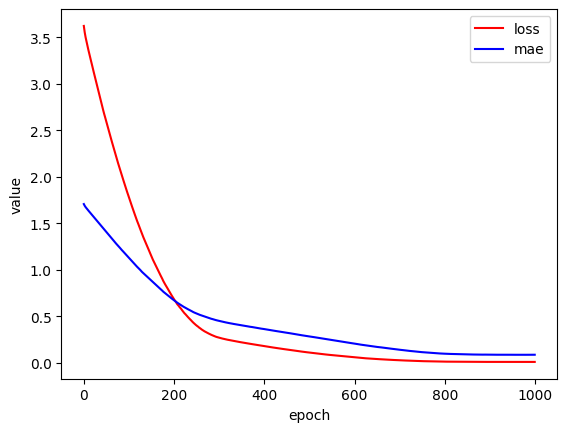

In [28]:
plt.plot(hist2.history['loss'],'r',label='loss')
plt.plot(hist2.history['mae'],'b',label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [29]:
# 7. 모델 사용
model2.predict(np.array([[-0.01],
                         [0],
                         [0.01],
                         [0.02]]))

1/1 [==============================] - 0s 50ms/step


array([[0.27194008],
       [0.2904931 ],
       [0.30904612],
       [0.3275991 ]], dtype=float32)

In [30]:
y_hat = model2.predict([scaled_data_C])
#y_hat
for h,y in zip(y_hat[::10],noised_scaled_data_F[::10]):
    print(h,y)

4/4 [==============================] - 0s 2ms/step
[0.2904931] 0.2750003435726217
[0.47602314] 0.3157418275437348
[0.6615532] 0.6573517921634632
[0.84708333] 0.8489619004243149
[1.0326133] 0.9109195630083544
[1.2181433] 1.3920337106547387
[1.4036735] 1.3455450551349164
[1.5892035] 1.6032367856264356
[1.7747335] 1.5738145874658984
[1.9602636] 1.8387117040714336


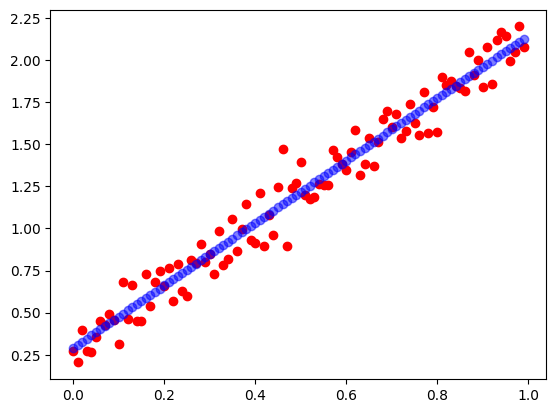

In [31]:
plt.scatter(x=scaled_data_C,y=noised_scaled_data_F, c='r')
plt.scatter(x=scaled_data_C,y=y_hat, c='b', alpha=0.5)
plt.show()

In [32]:
# 모델 저장
model2.save('model/noised_after_learning.h5')

In [33]:
# 저장된 모델 사용하기
from tensorflow.keras.models import load_model
model3 = load_model('model/noised_after_learning.h5')

In [34]:
model3.predict([[-0.01],[0],[0.01]])

1/1 [==============================] - 0s 45ms/step


array([[0.27194008],
       [0.2904931 ],
       [0.30904612]], dtype=float32)